
In this programming assignment I have implemented **Linear Regression**, **K-Nearest Neighbours** and **Perceptron algorithm**. 

## Problem 1: Linear Regression

### Part 1.1 Implementation

In [2]:
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2
from lr import LinearRegression, LinearRegressionWithL2Loss
from utils import mean_squared_error

import matplotlib.pyplot as plt

### Part 1.2 Sanity test

In [3]:
# Load data (features and values) from function `generate_data_part_1`
from data import generate_data_part_1
features, values = generate_data_part_1()

In [4]:
# Create a LinearRegression model and train the model using the loaded data
model = LinearRegression(nb_features=1)
model.train(features, values)

# MSE metric calculation
mse = mean_squared_error(values, model.predict(features))
print('[part 1.2]\tmse: {mse:.5f}'.format(mse=mse))

[part 1.2]	mse: 0.00175


In [5]:
plt.scatter([x[0] for x in features], values, label='origin');
plt.plot([x[0] for x in features], model.predict(features), label='predicted');
plt.legend()

### Part 1.3 Feature Engineering

#### Part 1.3.1 No extra features

In [6]:
# Feature Engineering: (a) No extra features
from data import generate_data_part_2
features, values = generate_data_part_2()

In [7]:
model = LinearRegression(nb_features=1)
model.train(features, values)

mse = mean_squared_error(values, model.predict(features))
print('[part 1.3.1]\tmse: {mse:.5f}'.format(mse=mse))

[part 1.3.1]	mse: 0.39997


In [9]:
plt.scatter([x[0] for x in features], values, label='origin');
plt.plot([x[0] for x in features], model.predict(features), label='predicted');
plt.legend()

####  Part 1.3.2 Adding polynomial features

In [10]:
from utils import polynomial_features
features, values = generate_data_part_2()
plt.scatter([x[0] for x in features], values, label='origin');

for k in [2, 4, 8]:
    features_extended = polynomial_features(features, k)
    model = LinearRegression(nb_features=k)
    model.train(features_extended, values)
    mse = mean_squared_error(values, model.predict(features_extended))
    print('[part 1.3.2]\tk: {k:d}\tmse: {mse:.5f}'.format(k=k, mse=mse))
    plt.plot([x[0] for x in features], model.predict(features_extended), label='k={k}'.format(k=k));
plt.legend()

[part 1.3.2]	k: 2	mse: 0.02315
[part 1.3.2]	k: 4	mse: 0.00002
[part 1.3.2]	k: 8	mse: 0.00000


### Part 1.4 Hyper-parameter and model selection 

For linear regression model with extra polynomial features, $k$ is a hyper-parameter. 
To choose the best one, have to 

    - train a model with that hyper-parameter based on the train set, 
    - calculate its performance on the validation set
    - select the best hyper-parameter (the trained model has the best performance on validation set). 
    
In this task, I am only searching $k$ among the set {1, 3, 10}. 

In [11]:
# Load data (features and values) from function generate data part 3. It’s a classification dataset, but here using it as a regression dataset.
from data import generate_data_part_3
features, values = generate_data_part_3()

# Splitting the data set into three parts
train_features, train_values = features[:100], values[:100]
valid_features, valid_values = features[100:120], values[100:120]
test_features, test_values = features[120:], values[120:]

assert len(train_features) == len(train_values) == 100
assert len(valid_features) == len(valid_values) == 20
assert len(test_features) == len(test_values) == 30

In [12]:
# Linear Regression(without loss)
best_mse, best_k = 1e10, -1
for k in [1, 3, 10]:
    train_features_extended = polynomial_features(train_features, k)
    model = LinearRegression(nb_features=k)
    model.train(train_features_extended, train_values)
    train_mse = mean_squared_error(train_values, model.predict(train_features_extended))

    valid_features_extended = polynomial_features(valid_features, k)
    valid_mse = mean_squared_error(valid_values, model.predict(valid_features_extended))
    print('[part 1.4.1]\tk: {k:d}\t'.format(k=k) + 
          'train mse: {train_mse:.5f}\tvalid mse: {valid_mse:.5f}'.format(
              train_mse=train_mse, valid_mse=valid_mse))

    if valid_mse < best_mse:
        best_mse, best_k = valid_mse, k

[part 1.4.1]	k: 1	train mse: 0.00909	valid mse: 0.33937
[part 1.4.1]	k: 3	train mse: 0.00261	valid mse: 3.28984
[part 1.4.1]	k: 10	train mse: 0.14747	valid mse: 193008.62771


In [13]:
combined_features_extended = polynomial_features(train_features + valid_features, best_k)
model = LinearRegression(nb_features=best_k)
model.train(combined_features_extended, train_values + valid_values)

test_features_extended = polynomial_features(test_features, best_k)
test_mse = mean_squared_error(test_values, model.predict(test_features_extended))
print('[part 1.4.1 Linear Regression]\tbest_k: {best_k:d}\ttest mse: {test_mse:.5f}'.format(
    best_k=best_k, test_mse=test_mse))

[part 1.4.1 Linear Regression]	best_k: 1	test mse: 0.13021


### Part 1.4.2 Linear Regression With L2 Loss (Ridge Regression)

In [15]:
''' For Ridge (linear regression with l2 loss) Regression, need to search  k  among {1, 3, 10}.  
    alpha is also a hyper-parameter. Searching  αlpha  among the set {0.01, 0.1, 1, 10}'''

from itertools import product

best_mse, best_k, best_alpha = 1e10, -1, -1
for k, alpha in product([1, 3, 10], [0.01, 0.1, 1, 10]):
    train_features_extended = polynomial_features(train_features, k)
    model = LinearRegressionWithL2Loss(nb_features=k, alpha=alpha)
    model.train(train_features_extended, train_values)
    train_mse = mean_squared_error(train_values, model.predict(train_features_extended))

    valid_features_extended = polynomial_features(valid_features, k)
    valid_mse = mean_squared_error(valid_values, model.predict(valid_features_extended))
    print('[part 1.4.2]\tk: {k:d}\talpha: {alpha}\t'.format(k=k, alpha=alpha) +
          'train mse: {train_mse:.5f}\tvalid mse: {valid_mse:.5f}'.format(
              train_mse=train_mse, valid_mse=valid_mse))

    if valid_mse < best_mse:
        best_mse, best_k, best_alpha = valid_mse, k, alpha

[part 1.4.2]	k: 1	alpha: 0.01	train mse: 0.00909	valid mse: 0.33964
[part 1.4.2]	k: 1	alpha: 0.1	train mse: 0.00911	valid mse: 0.34196
[part 1.4.2]	k: 1	alpha: 1	train mse: 0.00955	valid mse: 0.35604
[part 1.4.2]	k: 1	alpha: 10	train mse: 0.01058	valid mse: 0.40436
[part 1.4.2]	k: 3	alpha: 0.01	train mse: 0.00270	valid mse: 3.33796
[part 1.4.2]	k: 3	alpha: 0.1	train mse: 0.00288	valid mse: 2.69893
[part 1.4.2]	k: 3	alpha: 1	train mse: 0.00336	valid mse: 2.12091
[part 1.4.2]	k: 3	alpha: 10	train mse: 0.00412	valid mse: 1.56060
[part 1.4.2]	k: 10	alpha: 0.01	train mse: 0.00019	valid mse: 15779.13966
[part 1.4.2]	k: 10	alpha: 0.1	train mse: 0.00027	valid mse: 9166.37458
[part 1.4.2]	k: 10	alpha: 1	train mse: 0.00037	valid mse: 2407.83394
[part 1.4.2]	k: 10	alpha: 10	train mse: 0.00084	valid mse: 1519.89992


In [16]:
combined_features_extended = polynomial_features(train_features + valid_features, best_k)
model = LinearRegressionWithL2Loss(nb_features=best_k, alpha=best_alpha)
model.train(combined_features_extended, train_values + valid_values)

test_features_extended = polynomial_features(test_features, best_k)
test_mse = mean_squared_error(test_values, model.predict(test_features_extended))
print('[part 1.4.2]\tbest_k: {best_k:d}\tbest_alpha: {best_alpha:f}\t'.format(
    best_k=best_k, best_alpha=best_alpha) +
      'test mse: {test_mse:.5f}'.format(test_mse=test_mse))

[part 1.4.2]	best_k: 1	best_alpha: 0.010000	test mse: 0.13018


## Problem 2: K-nearest neighbor (KNN) for binary classification

In [17]:
# Implementing the class in file knn.py and functions in utils.py
%load_ext autoreload
%autoreload 2

from knn import KNN
from utils import euclidean_distance, gaussian_kernel_distance, inner_product_distance
from utils import f1_score

distance_funcs = {
    'euclidean': euclidean_distance,
    'gaussian': gaussian_kernel_distance,
    'inner_prod': inner_product_distance,
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Loading data
from data import generate_data_cancer
features, labels = generate_data_cancer()

train_features, train_labels = features[:400], labels[:400]
valid_features, valid_labels = features[400:460], labels[400:460]
test_features, test_labels = features[460:], labels[460:]

assert len(train_features) == len(train_labels) == 400
assert len(valid_features) == len(valid_labels) == 60
assert len(test_features) == len(test_labels) == 109

In [19]:
# Model Selection
# In kNN model, the parameter k is a hyper-parameter. Choosing k among {1, 3, 10, 20, 50}.
for name, func in distance_funcs.items():
    best_f1_score, best_k = -1, 0
    for k in [1, 3, 10, 20, 50]:
        model = KNN(k=k, distance_function=func)
        model.train(train_features, train_labels)
        train_f1_score = f1_score(
            train_labels, model.predict(train_features))

        valid_f1_score = f1_score(
            valid_labels, model.predict(valid_features))
        print('[part 2.1] {name}\tk: {k:d}\t'.format(name=name, k=k) + 
              'train: {train_f1_score:.5f}\t'.format(train_f1_score=train_f1_score) +
              'valid: {valid_f1_score:.5f}'.format(valid_f1_score=valid_f1_score))

        if valid_f1_score > best_f1_score:
            best_f1_score, best_k = valid_f1_score, k

    model = KNN(k=best_k, distance_function=func)
    model.train(train_features + valid_features,
                train_labels + valid_labels)
    test_f1_score = f1_score(test_labels, model.predict(test_features))
    print()
    print('[part 2.1] {name}\tbest_k: {best_k:d}\t'.format(name=name, best_k=best_k) +
          'test f1 score: {test_f1_score:.5f}'.format(test_f1_score=test_f1_score))
    print()

[part 2.1] euclidean	k: 1	train: 0.91577	valid: 0.96774
[part 2.1] euclidean	k: 3	train: 0.93246	valid: 0.97872
[part 2.1] euclidean	k: 10	train: 0.94143	valid: 0.97872
[part 2.1] euclidean	k: 20	train: 0.93991	valid: 0.97872
[part 2.1] euclidean	k: 50	train: 0.91949	valid: 0.96774

[part 2.1] euclidean	best_k: 3	test f1 score: 0.95000

[part 2.1] gaussian	k: 1	train: 0.91391	valid: 0.95652
[part 2.1] gaussian	k: 3	train: 0.89770	valid: 0.97872
[part 2.1] gaussian	k: 10	train: 0.72816	valid: 0.86792
[part 2.1] gaussian	k: 20	train: 0.90278	valid: 0.95556
[part 2.1] gaussian	k: 50	train: 0.73226	valid: 0.87850

[part 2.1] gaussian	best_k: 3	test f1 score: 0.87209

[part 2.1] inner_prod	k: 1	train: 0.72408	valid: 0.87850
[part 2.1] inner_prod	k: 3	train: 0.72408	valid: 0.87850
[part 2.1] inner_prod	k: 10	train: 0.72408	valid: 0.87850
[part 2.1] inner_prod	k: 20	train: 0.72408	valid: 0.87850
[part 2.1] inner_prod	k: 50	train: 0.72408	valid: 0.87850

[part 2.1] inner_prod	best_k: 1	test f1

In [20]:
# Data transformation: (a) Normalizing the feature vector (b) Min-max scaling the feature matrix

from utils import NormalizationScaler, MinMaxScaler

scaling_functions = {
    'min_max_scale': MinMaxScaler,
    'normalize': NormalizationScaler,
}

In [21]:
# Model Selection
for scaling_name, scaling_class in scaling_functions.items():
    for name, func in distance_funcs.items():
        scaler = scaling_class()
        train_features_scaled = scaler(train_features)
        valid_features_scaled = scaler(valid_features)

        best_f1_score, best_k = 0, -1
        for k in [1, 3, 10, 20, 50]:
            model = KNN(k=k, distance_function=func)
            model.train(train_features_scaled, train_labels)
            train_f1_score = f1_score(
                train_labels, model.predict(train_features_scaled))
            
            valid_f1_score = f1_score(
                valid_labels, model.predict(valid_features_scaled))
            print('[part 2.2] {name}\t{scaling_name}\tk: {k:d}\t'.format(name=name, scaling_name=scaling_name, k=k) +
                  'train: {train_f1_score:.5f}\t'.format(train_f1_score=train_f1_score) + 
                  'valid: {valid_f1_score:.5f}'.format(valid_f1_score=valid_f1_score))

            if valid_f1_score > best_f1_score:
                best_f1_score, best_k = valid_f1_score, k
    

        # now change it to new scaler, since the training set changes
        scaler = scaling_class()
        combined_features_scaled = scaler(train_features + valid_features)
        test_features_scaled = scaler(test_features)

        model = KNN(k=best_k, distance_function=func)
        model.train(combined_features_scaled, train_labels + valid_labels)
        test_f1_score = f1_score(test_labels, model.predict(test_features_scaled))
        print()
        print('[part 2.2] {name}\t{scaling_name}\t'.format(name=name, scaling_name=scaling_name) +
              'best_k: {best_k:d}\ttest: {test_f1_score:.5f}'.format(best_k=best_k, test_f1_score=test_f1_score))
        print()

[part 2.2] euclidean	min_max_scale	k: 1	train: 0.95595	valid: 0.95652
[part 2.2] euclidean	min_max_scale	k: 3	train: 0.96491	valid: 0.98947
[part 2.2] euclidean	min_max_scale	k: 10	train: 0.96916	valid: 0.97872
[part 2.2] euclidean	min_max_scale	k: 20	train: 0.97155	valid: 0.97826
[part 2.2] euclidean	min_max_scale	k: 50	train: 0.95075	valid: 0.98947

[part 2.2] euclidean	min_max_scale	best_k: 3	test: 0.00000

[part 2.2] gaussian	min_max_scale	k: 1	train: 0.95595	valid: 0.95652
[part 2.2] gaussian	min_max_scale	k: 3	train: 0.96491	valid: 0.98947
[part 2.2] gaussian	min_max_scale	k: 10	train: 0.96916	valid: 0.97872
[part 2.2] gaussian	min_max_scale	k: 20	train: 0.97155	valid: 0.97826
[part 2.2] gaussian	min_max_scale	k: 50	train: 0.95075	valid: 0.98947

[part 2.2] gaussian	min_max_scale	best_k: 3	test: 0.86458

[part 2.2] inner_prod	min_max_scale	k: 1	train: 0.72408	valid: 0.87850
[part 2.2] inner_prod	min_max_scale	k: 3	train: 0.72408	valid: 0.87850
[part 2.2] inner_prod	min_max_scale	

## Problem 3: Perceptron Problem 
Note: Perceptron algorithm can converge only when the data is linearly seperable. 

In [22]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 
from data import generate_data_perceptron 
from perceptron import Perceptron
import numpy as np

# Using only 2 features
nb_features=2
model = Perceptron(nb_features=nb_features)
x, y = generate_data_perceptron(nb_features=nb_features, seperation=2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


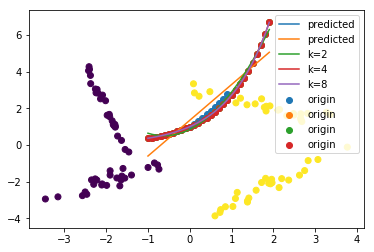

In [23]:
# plot and satisfy your self that data is linearly seperable
x1 = []
x2 = []
for i in x:
    x1.append(i[1])
    x2.append(i[2])
plt.scatter(x1, x2, c=y)
plt.show()

In [24]:
converged = model.train(x, y)
y_hat = model.predict(x) 
correct = 0 
for i, y_real in enumerate(y):
    if (y_hat[i]==y_real):
        correct = correct + 1
    
print ("Accuracy on training data is {}".format(correct*100/len(y)))
print (correct)


Accuracy on training data is 100.0
100


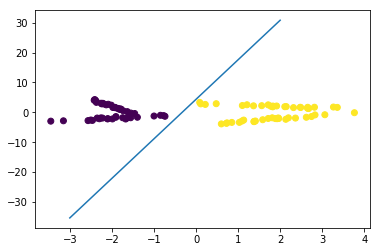

In [25]:
# Plotting the data points and seperating hyperplane to see if perceptron has actually learnt correct seperating plane
w = model.get_weights()
x1 = []
x2 = []
for i in x:
    x1.append(i[1])
    x2.append(i[2])
plt.scatter(x1, x2, c=y)
plt.plot(np.arange(-3, 3, 1), -(w[1] * np.arange(-3, 3, 1) + w[0]) / w[2])
plt.show()

In [26]:
# Splitting the data into 80-20 of train and test
# Results are expected to change on shuffling the data
temp_x = np.insert(x, len(x[0]), y, axis=1)
np.random.shuffle(temp_x)
x = temp_x[:,:(len(temp_x[0])-1)]
y = temp_x[:,[len(temp_x[0])-1]]
y = y.flatten()
y = np.ndarray.tolist(y)

model.reset()
print (model.get_weights())
test_x, train_x = x[80:], x[:80]
test_y, train_y = y[80:], y[:80]
converged = model.train(train_x, train_y)
y_hat = model.predict(test_x) 
correct = 0 
for i, y_real in enumerate(test_y):
    if (y_hat[i]==y_real):
        correct = correct + 1
    
print ("Accuracy on testing data is {}".format(correct*100/len(test_y)))


[0, 0, 0]
Accuracy on testing data is 100.0


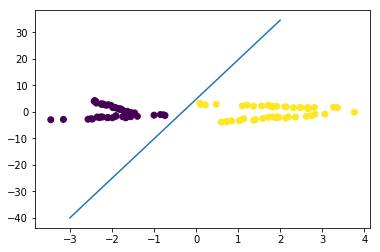

In [27]:
w = model.get_weights()
x1 = []
x2 = []
for i in x:
    x1.append(i[1])
    x2.append(i[2])
plt.scatter(x1, x2, c=y)
plt.plot(np.arange(-3, 3, 1), -(w[1] * np.arange(-3, 3, 1) + w[0]) / w[2])
plt.show()

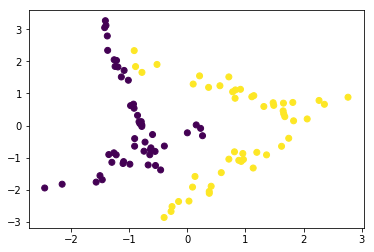

In [28]:
# When data is not linearly seperable
nb_features=2
model = Perceptron(nb_features=nb_features)
x, y = generate_data_perceptron(nb_features=nb_features, seperation=1)
# plot and satisfy your self that data is not linearly seperable
x1 = []
x2 = []
for i in x:
    x1.append(i[1])
    x2.append(i[2])
plt.scatter(x1, x2, c=y)
plt.show()

In [29]:
converged = model.train(x, y)
if (converged):
    print ('Algorithm has converged')
else:
    print ('Algorithm didnot converge')
    
y_hat = model.predict(x) 
correct = 0 
for i, y_real in enumerate(y):
    if (y_hat[i]==y_real):
        correct = correct + 1
    
print ("Accuracy on training data is {}".format(correct*100/len(y)))
print (correct)

Algorithm didnot converge
Accuracy on training data is 81.0
81


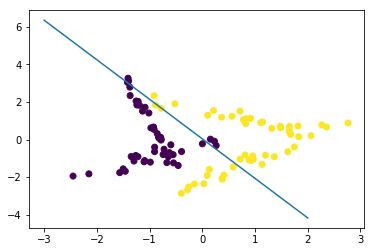

In [30]:
w = model.get_weights()
x1 = []
x2 = []
for i in x:
    x1.append(i[1])
    x2.append(i[2])
plt.scatter(x1, x2, c=y)
plt.plot(np.arange(-3, 3, 1), -(w[1] * np.arange(-3, 3, 1) + w[0]) / w[2])
plt.show()

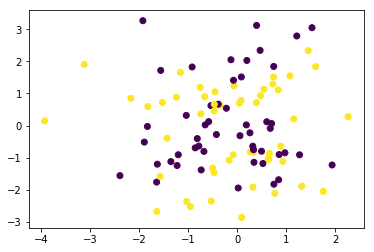

In [31]:
# we visualized only first two features, so data might not look seperable but might really be seperable
nb_features=10
model = Perceptron(nb_features=nb_features)

# use seperation=1 for non-seperable 
# use seperation=2 for seperable 

x, y = generate_data_perceptron(nb_features=nb_features, seperation=1)
# plot first two dimensions
x1 = []
x2 = []
for i in x:
    x1.append(i[1])
    x2.append(i[2])
plt.scatter(x1, x2, c=y)
plt.show()

In [32]:
converged = model.train(x, y)
if (converged):
    print ('Algorithm has converged')
else:
    print ('Algorithm didnot converge')
    
y_hat = model.predict(x) 
correct = 0 
for i, y_real in enumerate(y):
    if (y_hat[i]==y_real):
        correct = correct + 1
    
print ("Accuracy on training data is {}".format(correct*100/len(y)))
print (correct)

Algorithm didnot converge
Accuracy on training data is 88.0
88
